<a href="https://colab.research.google.com/github/pmj-chosim/Commit-Project-2023.1.20-2023.2.28-/blob/main/2023.01.30/%20sgdc%20with%20log%26hinge%20loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. <확률적 경사 하강법 =SGD>**
가장 낮은 기울기 찾아가는 법(가장 적합한 기울기)

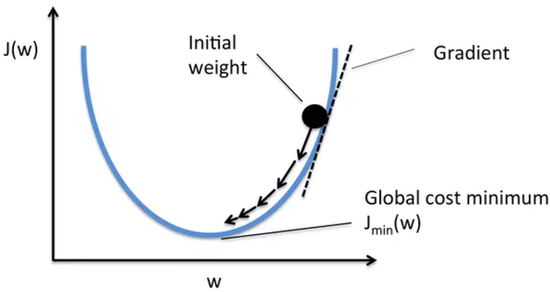

In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv')

In [2]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [5]:
from sklearn.linear_model import SGDClassifier

In [6]:
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [7]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


0.81훈련세트 핏 값인데 테스트 세트 핏값이 0.85로 더 크니까 과대적합인 상태>> 과대적합을 조절해보자

**2. 에포크 횟수로 과대/과소적합 조절**

In [8]:
import numpy as np

sc = SGDClassifier(loss='log', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [9]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

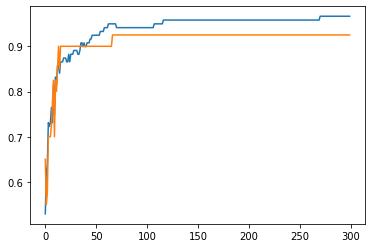

In [10]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.show()

에포크 100일때까 둘 사이 간격도 좁아 훈련도도 비슷하고 훈련세트 적합도가 더 커서 좋음

In [15]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=555)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))


0.957983193277311
0.925


*로그 손실
확률 값을 음의 log함수에 넣어 변환을 시킨 값으로 평가하는데, 이는 잘못 예측할 수록, 패널티를 부여하기 위함.

ex) 100%의 확률(확신)로 답을 구한 경우 log loss는 -log(1.0) = 0이다. 80% 확률의 경우에는, -log(0.8) = 0.22314이다. 60% 확률의 경우에는, -log(0.6) = 0.51082이다.

확률이 낮아질 수록 log loss 값이 기하급수적으로 증가. 이런식으로 log loss는 확률이 낮을 때 패널티를 더 많이 부여하기 위해 음의 로그 함수를 사용.

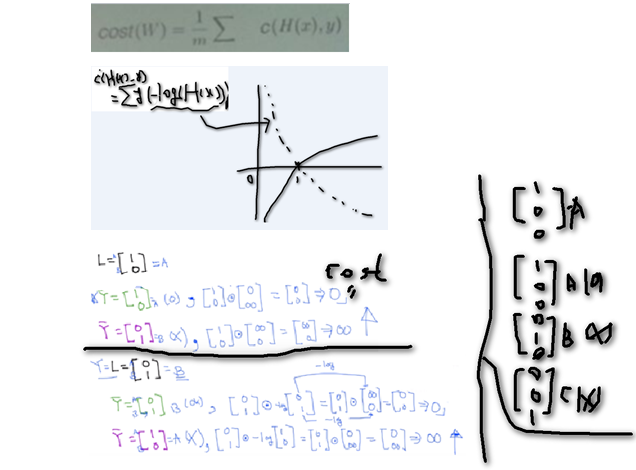

max_iter=100, 에포크 100번하니까 값이 괜찮네

In [16]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


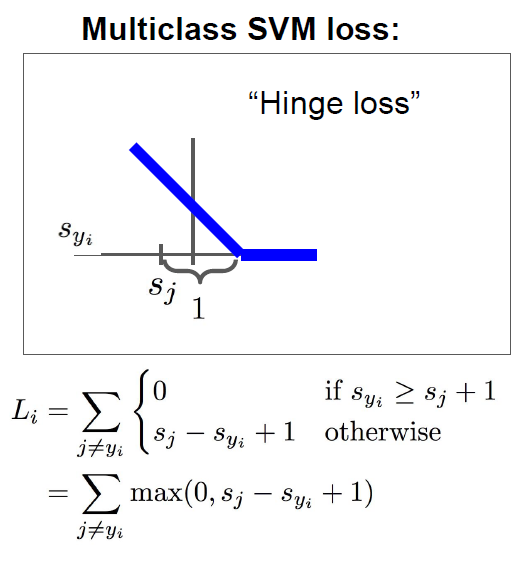

1보다 크면 손실값 0, 1보다 작을 수록 손실값 커짐